In [4]:
!pip install emoji
!pip install textblob
!pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sna
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import requests as re
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('vader_lexicon')

import string
from string import punctuation
import re
import emoji
from textblob import TextBlob



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
file = '/content/sample_data/President Droupadi Murmu’s speech on 78th Independence Day eve.txt'
with open(file,'r', encoding='utf-8') as file:
  speech =file.read()

print(file)
print(speech)

<_io.TextIOWrapper name='/content/sample_data/President Droupadi Murmu’s speech on 78th Independence Day eve.txt' mode='r' encoding='utf-8'>
I extend to you all my heartiest Independence Day greetings.
I am delighted to see the nation prepare to celebrate the 78thIndependence Day. Witnessing the tri-colour unfurl on this occasion, be it at the Red Fort, at state capitals or in local neighbourhoods, always thrills our hearts. It is an expression of the joy of being part of our great nation along with more than 1.4 billion fellow Indians. Just as we celebrate various festivals with our families, we celebrate our Independence Day and Republic Day with our family that comprises our fellow citizens.On 15th of August, in all parts of the country and also abroad, Indians participate in the flag-hoisting ceremonies, sing patriotic songs, and distribute sweets. Young children participate in cultural events. When we hear them talking about our great nation and about the privilege of being a citi

In [30]:
# Test_preprocessing;
def preprocessing(text):

  #Lower
  text=str(text).lower()

  #Remove html tag
  bs=BeautifulSoup(text)
  text = bs.get_text()

  #Remove url
  text = re.compile(r'https?://\S+|www\.\S+').sub('',text)
  #print('after Url remove',text)

  #Replace certian special character
  text = text.replace('%', ' percent')
  text = text.replace('$', ' dollar ')
  text = text.replace('₹', ' rupee ')
  text = text.replace('€', ' euro ')
  text = text.replace('@', ' at ')

  # Replacing some number with string equivalents (not perfect, can be done better to account for more cases)

  text = text.replace(',000,000,000', 'b ')
  text = text.replace(',000,000 ', 'm ')
  text = text.replace(',000', 'k')
  text = re.sub(r'([0-9]+)000000000', r'\1b', text)
  text = re.sub(r'([0-9]+)00000', r'\1m', text)
  text = re.sub(r'([0-9]+)000', r'\1k',text)

  #Remove chat word # not need as it's speech but still we will use

  # Decontracting words
  contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "can not",
  "can't've": "can not have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it would",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so as",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there would",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we would",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you would",
  "you'd've": "you would have",
  "you'll": "you will",
  "you'll've": "you will have",
  "you're": "you are",
  "you've": "you have",
  "'ve" : "have",
  "n't" : "not",
  "'re" : "are",
  "'ll" : "will"
  }

  speech_decontracted = []

  for word in text.split():
    if word in contractions:
      word = contractions[word]
    speech_decontracted.append(word)

  text = ' '.join(speech_decontracted)

  #Remove punctuations
  for char in string.punctuation:
    text = text.replace(char,'')

  # Remove stop word
  text = ' '.join([ word for word in text.split() if word not in stopwords.words('english')])

  # Remove emoji
  test = emoji.demojize(text)

  #spell check
  text =TextBlob(text).correct().string
  #print('Corrrect the speech',test)

  # Tokenize the words
  text =nltk.word_tokenize(text)

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text]

  return text


In [31]:
#preprocessing("I'm gooing to <b>offfice</b> tomorrow morning! with my Friends ")

['going', 'office', 'tomorrow', 'morning', 'friend']

In [33]:
words=preprocessing(speech)

In [35]:
words

['extend',
 'earliest',
 'independence',
 'day',
 'greeting',
 'delighted',
 'see',
 'nation',
 'prepare',
 'celebrate',
 '78thindependence',
 'day',
 'witnessing',
 'tricolour',
 'unfurled',
 'occasion',
 'red',
 'fort',
 'state',
 'capital',
 'local',
 'neighbourhood',
 'always',
 'thrill',
 'heart',
 'expression',
 'joy',
 'part',
 'great',
 'nation',
 'along',
 '14',
 'billion',
 'fellow',
 'indian',
 'celebrate',
 'various',
 'festival',
 'family',
 'celebrate',
 'independence',
 'day',
 'republic',
 'day',
 'family',
 'comprise',
 'fellow',
 'citizen',
 'with',
 'august',
 'part',
 'country',
 'also',
 'abroad',
 'indian',
 'participate',
 'flaghoisting',
 'ceremony',
 'sing',
 'patriotic',
 'song',
 'distribute',
 'sweet',
 'young',
 'child',
 'participate',
 'cultural',
 'event',
 'hear',
 'talking',
 'great',
 'nation',
 'privilege',
 'citizen',
 'find',
 'word',
 'echo',
 'great',
 'freedom',
 'fighter',
 'used',
 'say',
 'realise',
 'part',
 'chain',
 'bind',
 'dream',
 'par

In [37]:
sentiments = SentimentIntensityAnalyzer()
sentiment_score =[sentiments.polarity_scores(word)['compound'] for word in words] #  text expresses a positive, negative or neutral opinion, 1=+ve, -1=-ve,0= nutral
avg_sentiment = np.mean(sentiment_score)

In [39]:
avg_sentiment

0.04408313689936537

In [45]:
positive_words = [word for word in words if sentiments.polarity_scores(word)['compound'] >0]
negative_words = [word for word in words if sentiments.polarity_scores(word)['compound'] <0]
neutral_words = [word for word in words if sentiments.polarity_scores(word)['compound'] == 0]

In [48]:
neutral_words

['earliest',
 'independence',
 'day',
 'see',
 'nation',
 'prepare',
 '78thindependence',
 'day',
 'witnessing',
 'tricolour',
 'unfurled',
 'occasion',
 'red',
 'fort',
 'state',
 'capital',
 'local',
 'neighbourhood',
 'always',
 'heart',
 'expression',
 'part',
 'nation',
 'along',
 '14',
 'billion',
 'fellow',
 'indian',
 'various',
 'family',
 'independence',
 'day',
 'republic',
 'day',
 'family',
 'comprise',
 'fellow',
 'citizen',
 'with',
 'august',
 'part',
 'country',
 'also',
 'abroad',
 'indian',
 'participate',
 'flaghoisting',
 'ceremony',
 'sing',
 'patriotic',
 'song',
 'distribute',
 'young',
 'child',
 'participate',
 'cultural',
 'event',
 'hear',
 'talking',
 'nation',
 'citizen',
 'find',
 'word',
 'echo',
 'used',
 'say',
 'realise',
 'part',
 'chain',
 'bind',
 'participated',
 'aspiration',
 'witness',
 'nation',
 'remaining',
 'full',
 'year',
 'comerealising',
 'link',
 'chain',
 'history',
 'fumbling',
 'make',
 'u',
 'recall',
 'day',
 'nation',
 'foreign',

In [49]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 90 samples and 156 outcomes>
<FreqDist with 27 samples and 35 outcomes>
<FreqDist with 587 samples and 912 outcomes>


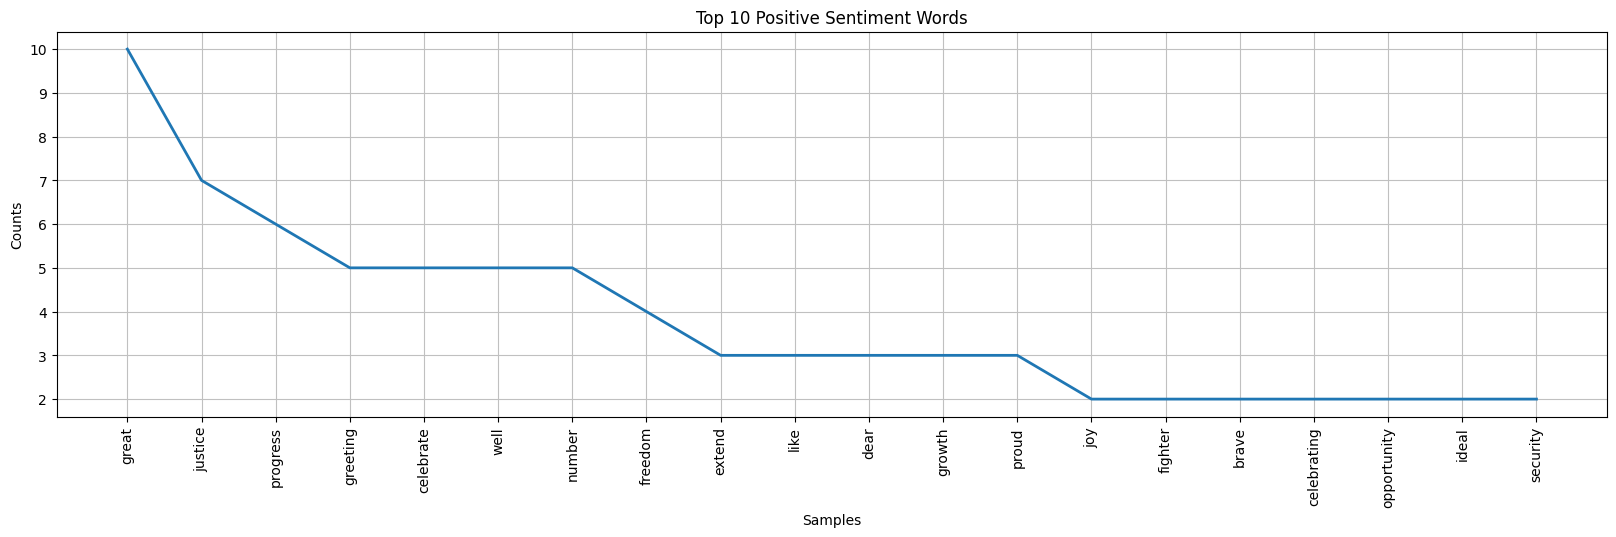

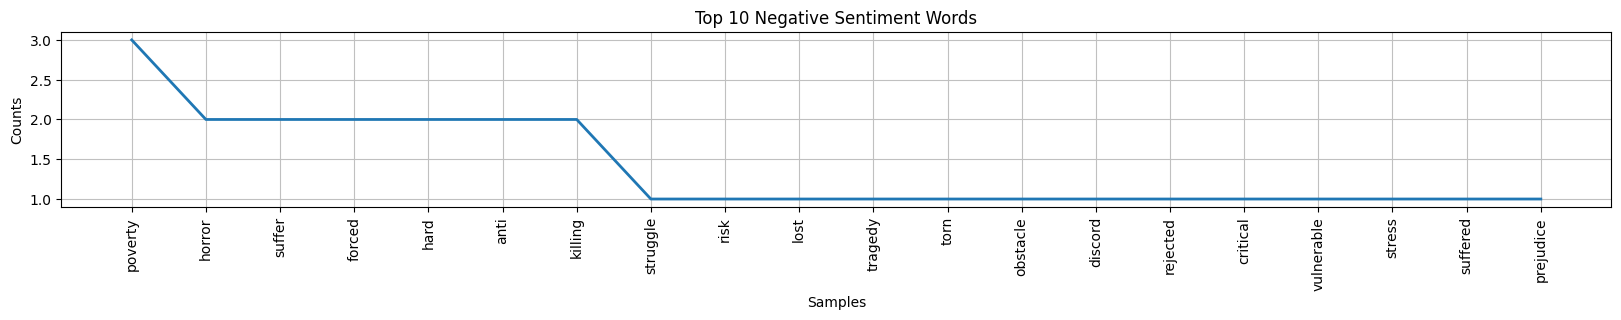

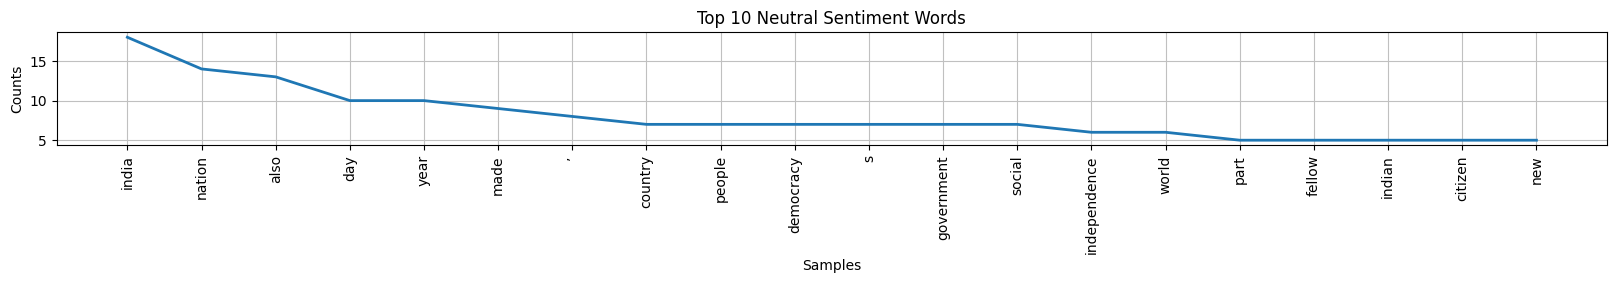

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(111)
word_freq_positive.plot(20,title='Top 10 Positive Sentiment Words')

plt.figure(figsize=(20,5))
plt.subplot(211)
word_freq_negative.plot(20,title='Top 10 Negative Sentiment Words')

plt.figure(figsize=(20,5))
plt.subplot(311)
word_freq_neutral.plot(20,title='Top 10 Neutral Sentiment Words')

plt.show()

In [57]:
WordCould_positive = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_positive)
WordCloud_negative = WordCloud(width=800, height=400, background_color='green').generate_from_frequencies(word_freq_negative)
WordCloud_neutral =  WordCloud(width=800, height=400, background_color='orange').generate_from_frequencies(word_freq_neutral)

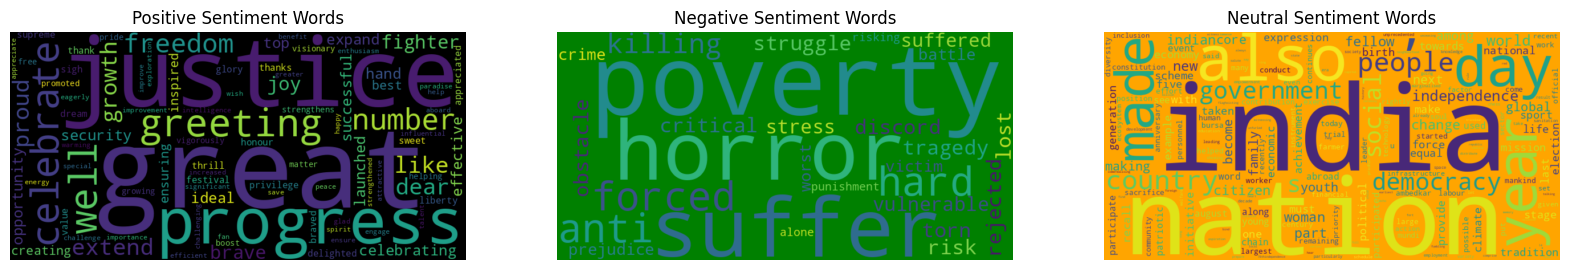

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(WordCould_positive,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words')

plt.subplot(132)
plt.imshow(WordCloud_negative,interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words')

plt.subplot(133)
plt.imshow(WordCloud_neutral,interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Words')

plt.show()